In [3]:
%load_ext autoreload
%autoreload 2

import random
import networkx as nx
import numpy as np

from qiskit_optimization.applications.ising.stable_set import StableSet
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer, CplexOptimizer



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


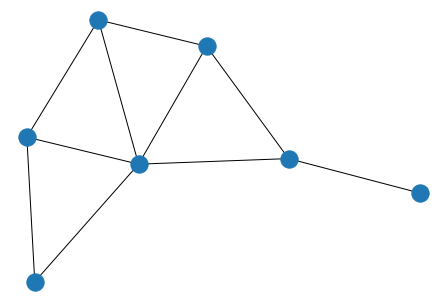

In [16]:
g=nx.gnm_random_graph(7,10, 123)
pos = nx.spring_layout(g, seed=111)
nx.draw(g, pos=pos)

In [17]:
stable_set = StableSet(g)

In [20]:
qp = stable_set.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: stable set

Maximize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + [ - 20000 x_0*x_1
      - 20000 x_0*x_2 - 20000 x_0*x_6 - 20000 x_1*x_2 - 20000 x_1*x_5
      - 20000 x_2*x_3 - 20000 x_2*x_4 - 20000 x_2*x_6 - 20000 x_3*x_4
      - 20000 x_3*x_6 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
 0 <= x_6 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5 x_6
End

In [24]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 3.0
optimal value: [-0.  1.  0.  0.  1.  0.  1.]
status: SUCCESS

In [27]:
stable_set.interpret(result)

[1, 4, 6]

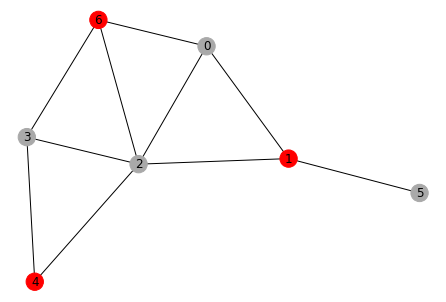

In [28]:
stable_set.draw_graph(result, pos=pos)